# **Beamformers**

#### References
- Optimum Array Processing - Van Trees
- https://classes.engineering.wustl.edu/ese497/images/a/a1/Beam18.pdf

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:

def compute_steering_vector(num_ant=8, angle_res=1, angle_rng=90):
    """ Computes array of Steering Vectors for a desired angluar range
        and resolution. **This is a special function that only computes the
        steering vectors along a 1D linear axis.**
        Inputs:
            angle_res - angle resolution in degrees
            angle_rng - single sided angle range
            num_ant - number of virtual antennas
        Output:
            steering_vectors
    """
    # get number of steering vectors based on desired angle range and resolution
    num_vec = (2 * angle_rng / angle_res + 1)
    num_vec = int(round(num_vec))

    # convert to radians
    angle_rng = angle_rng*np.pi/180
    angle_res = angle_res*np.pi/180

    # compute steering vectors
    steering_vectors = np.zeros((num_vec, num_ant), dtype=np.complex64)
    for k in range(num_vec):
        for m in range(num_ant):
            steering_vectors[k, m] = np.exp(-1j*np.pi*m
                                            *np.sin(-angle_rng + k*angle_res))
            
    return steering_vectors

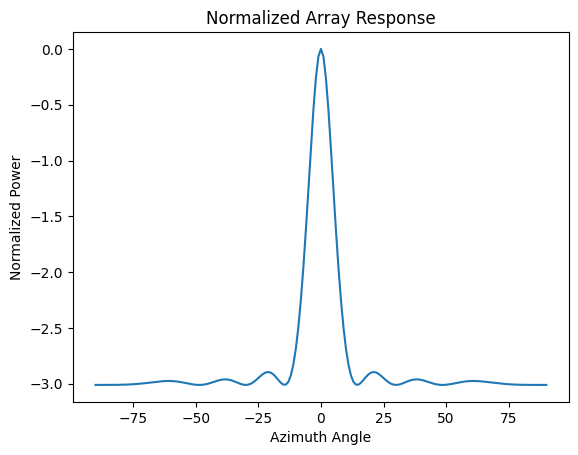

In [3]:
array_response = compute_steering_vector(num_ant=8, angle_res=1, angle_rng=90)

# compute power of array response
response_pwr = np.var(array_response, axis=1)
response_pwr += response_pwr.max() # normalize

plt.plot(np.linspace(-90, 90, len(response_pwr)), -10*np.log10(response_pwr))
plt.title("Normalized Array Response")
plt.xlabel("Azimuth Angle")
plt.ylabel("Normalized Power");

Now let's steer the beam (just for fun!)

In [4]:
M = 80 # number of antennas
theta = 0 # steering angle in degrees
angle_res = 0.25 # angle resolution in degrees

# array element vector
r = np.arange(0, M)

# array_manifold = compute_steering_vector(num_ant=M, angle_res=angle_res, angle_rng=90)
array_manifold = compute_steering_vector(num_ant=M, angle_res=angle_res, angle_rng=90)
steering_vector = np.exp(-1j*np.pi*r*np.sin(theta*np.pi/180))

num_angles = array_manifold.shape[0]
angle_span = np.linspace(-90, 90, num_angles)

In [5]:
array_manifold.shape, r.shape

((721, 80), (80,))

Compute Array Pattern with the Steering Vector and the Array Manifold

In [6]:
pattern = np.conjugate(array_manifold) @ steering_vector[:, None]

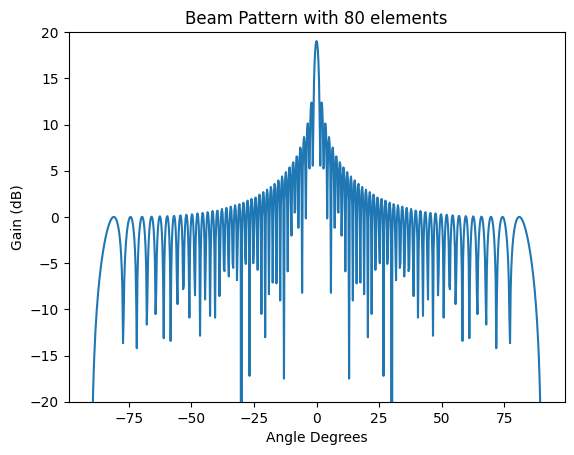

In [7]:
# plt.plot(np.linspace(-90, 90, len(steer_pwr)), np.abs(tmp))
plt.plot(angle_span, 10*np.log10(np.abs(pattern)));
plt.ylim(-20, 20);
plt.title(f"Beam Pattern with {M} elements")
plt.xlabel("Angle Degrees")
plt.ylabel("Gain (dB)");


In [8]:
thetas = np.arange(-90, 90+angle_res, angle_res)

array_patterns = []
for _theta in thetas:
    steering_vector = np.exp(-1j*np.pi*r*np.sin(_theta*np.pi/180))
    pattern = np.conjugate(array_manifold) @ steering_vector[:, None]

    array_patterns.append(pattern)

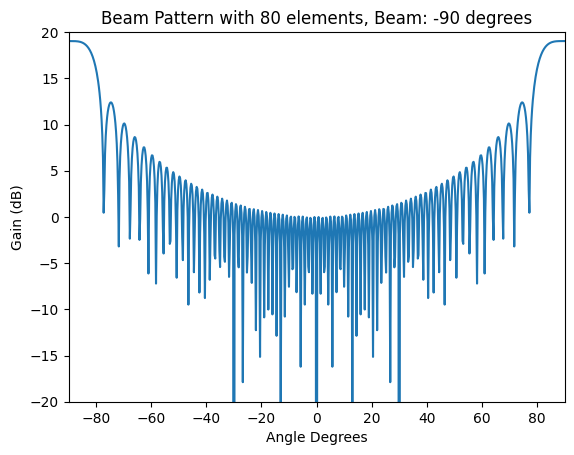

In [9]:
plt.plot(angle_span, 10*np.log10(np.abs(array_patterns[0])))
plt.ylim(-20, 20);
plt.xlim(-90, 90)
plt.title(f"Beam Pattern with {M} elements, Beam: -90 degrees")
plt.xlabel("Angle Degrees")
plt.ylabel("Gain (dB)");

### Make GIF

ref: https://www.geeksforgeeks.org/create-an-animated-gif-using-python-matplotlib/

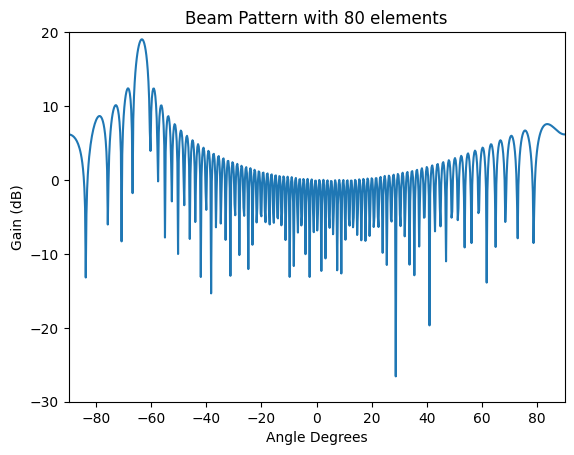

In [219]:
import matplotlib.animation as animation

# fig, ax = plt.subplots()
# ax.set_xlim([0, 10])

# scat = ax.plot(1, 0)
# x = np.linspace(0, 10)


figure = plt.figure()
 
# creating a plot
lines_plotted = plt.plot([])     
line_plotted = lines_plotted[0]
 
# Need to have x and y limits for plots to show
plt.xlim(-90, 90)  
plt.ylim(-30, 20)

plt.title(f"Beam Pattern with {M} elements")
plt.xlabel("Angle Degrees")
plt.ylabel("Gain (dB)")


def animate(i):

    theta = thetas[i]
    steering_vector = np.exp(-1j*np.pi*r*np.sin(theta))
    pattern = np.conjugate(array_manifold) @ steering_vector[:, None]
    pattern = 10*np.log10(np.abs(pattern))
 
    # line is set with new values of x and y
    line_plotted.set_data((angle_span, pattern))
    

ani = animation.FuncAnimation(figure, animate, repeat=True,
                              frames=num_angles, 
                              interval=1)

# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=5,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('beams.gif', writer=writer)

Let's do it agains with a Polar Plot

In [12]:
M = 80 # number of antennas
theta = 60 # steering angle in degrees
angle_res = 0.25 # angle resolution in degrees

# array element vector
r = np.arange(0, M)

# array_manifold = compute_steering_vector(num_ant=M, angle_res=angle_res, angle_rng=90)
array_manifold = compute_steering_vector(num_ant=M, angle_res=angle_res, angle_rng=180)
steering_vector = np.exp(-1j*np.pi*r*np.sin(theta*np.pi/180))

num_angles = array_manifold.shape[0]
angle_span = np.linspace(-90, 90, num_angles)

pattern = np.conjugate(array_manifold) @ steering_vector[:, None]

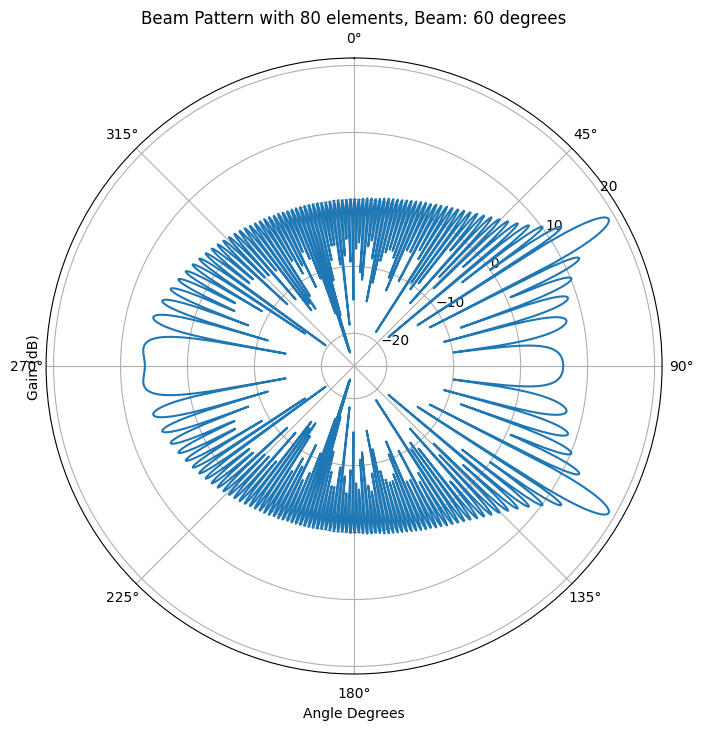

In [13]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8,8))
ax.plot(np.linspace(-np.pi, np.pi, array_manifold.shape[0]), 
        10*np.log10(np.abs(pattern))) # MAKE SURE TO USE RADIAN FOR POLAR
ax.set_theta_zero_location('N') # make 0 degrees point up
ax.set_theta_direction(-1) # increase clockwise
ax.set_rlabel_position(55)  # Move grid labels away from other labels

ax.set_title(f"Beam Pattern with {M} elements, Beam: {theta} degrees")
ax.set_xlabel("Angle Degrees")
ax.set_ylabel("Gain (dB)");


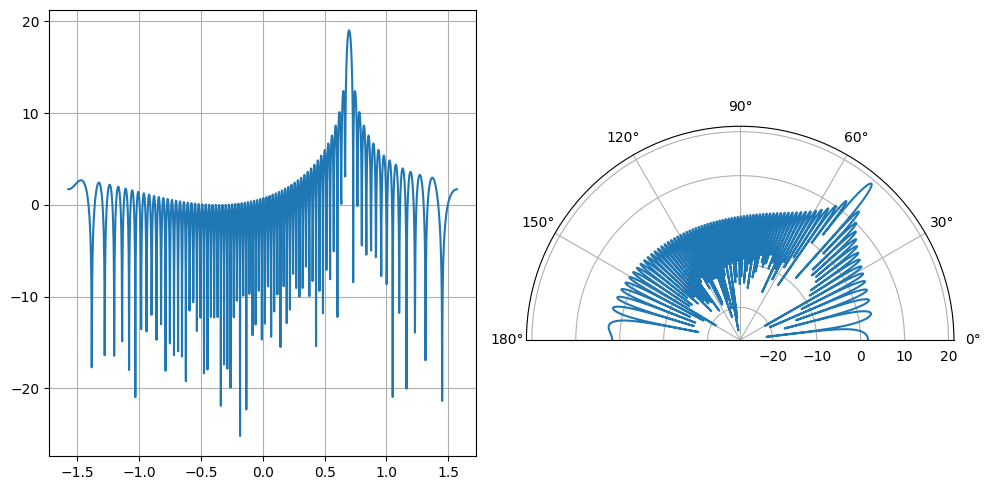

In [97]:

theta = np.linspace(0,(np.pi)/2)
r = np.sin(theta)

fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(wspace=0)
ax1 = fig.add_subplot(121)
ax1.grid()
ax2 = fig.add_subplot(122, polar=True)
ax2.set_thetamin(0)
ax2.set_thetamax(180)

# ax1.set_ylim(0, 1.05)
# ax2.set_ylim(0, 1.05)

# sc1 = ax1.scatter(np.rad2deg(theta), r, c=r, s=5, cmap='hsv', alpha=0.85)
# sc2 = ax2.scatter(theta,r, c=r, s=5, cmap='hsv', alpha=0.85)

ax1.plot(np.linspace(-np.pi/2, np.pi/2, array_manifold.shape[0]), 10*np.log10(np.abs(pattern)))
ax2.plot(np.linspace(np.pi, 0, array_manifold.shape[0]), 10*np.log10(np.abs(pattern)))

plt.tight_layout()

plt.show() 